In [2]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models, regularizers, callbacks
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import os

max_len = 200
num_words = 10000

2025-06-11 17:03:00.674747: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749664980.785202    1364 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749664980.809829    1364 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749664980.874034    1364 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749664980.874094    1364 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749664980.874103    1364 computation_placer.cc:177] computation placer alr

/home/user/TradingBOT-SMC/crypto_Bot_v0.0/libs/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-06-11 17:03:24.968190: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 272s 2s/step - accuracy: 0.2592 - loss: 3.6372 - val_accuracy: 0.4869 - val_loss: 2.2223
Epoch 2/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 268s 2s/step - accuracy: 0.4946 - loss: 2.2145 - val_accuracy: 0.5481 - val_loss: 1.8901
Epoch 3/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 288s 3s/step - accuracy: 0.5548 - loss: 1.8956 - val_accuracy: 0.5476 - val_loss: 1.8058
Epoch 4/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.5711 - loss: 1.7591 - val_accuracy: 0.5682 - val_loss: 1.7509
Epoch 5/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 607s 5s/step - accuracy: 0.5924 - loss: 1.6170 - val_accuracy: 0.5687 - val_loss: 1.7429
Epoch 6/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 519s 5s/step - accuracy: 0.6066 - loss: 1.5245 - val_accuracy: 0.5821 - val_loss: 1.7476
Epoch 7/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 434s 4s/step - accuracy: 0.6095 - loss: 1.4649 - val_accuracy: 0.5687 - val_loss: 1.7344
Epoch 8/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 381s 3s/step - accuracy: 0.6284 - loss: 1.3874 - val_accu

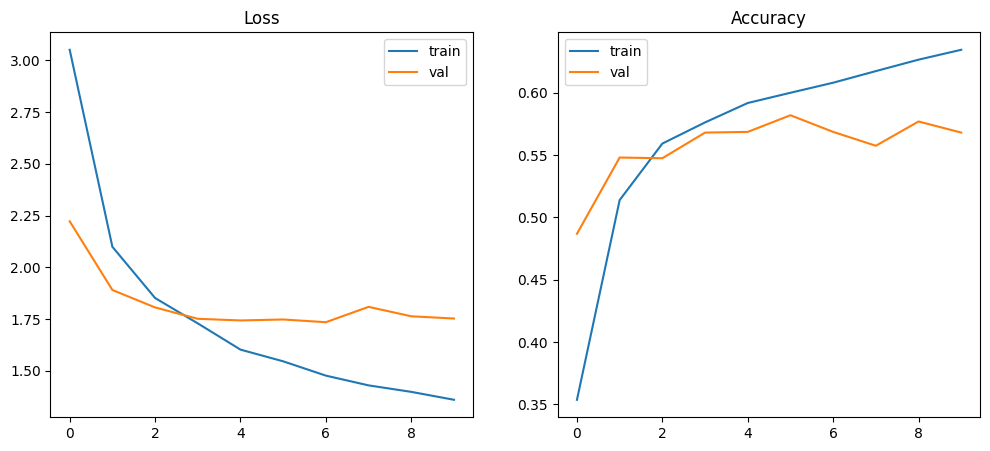

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=num_words)
train_data = pad_sequences(train_data, maxlen=max_len)
test_data = pad_sequences(test_data, maxlen=max_len)
num_classes = max(train_labels) + 1
train_labels = to_categorical(train_labels, num_classes=num_classes)
test_labels = to_categorical(test_labels, num_classes=num_classes)

model_path = "modelo_reuters_multiclasse.keras"
if os.path.exists(model_path):
    model = load_model(model_path)
else:
    model = models.Sequential([
        layers.Embedding(num_words, 128, input_length=max_len),
        layers.GRU(128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True),
        layers.GRU(64, dropout=0.3, recurrent_dropout=0.3),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    history = model.fit(
        train_data, train_labels,
        epochs=15,
        batch_size=64,
        validation_split=0.2,
        callbacks=[early_stop]
    )
    model.save(model_path)

    # Curvas de loss e accuracy
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title('Loss')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='val')
    plt.title('Accuracy')
    plt.legend()
    plt.show()




In [4]:
# Avaliação
loss, accuracy = model.evaluate(test_data, test_labels)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 46s 644ms/step - accuracy: 0.5750 - loss: 1.7421
Test Loss: 1.7724, Test Accuracy: 0.5610


71/71 ━━━━━━━━━━━━━━━━━━━━ 46s 510ms/step


/home/user/TradingBOT-SMC/crypto_Bot_v0.0/libs/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user/TradingBOT-SMC/crypto_Bot_v0.0/libs/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user/TradingBOT-SMC/crypto_Bot_v0.0/libs/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.11      0.51      0.19       105
           2       0.00      0.00      0.00        20
           3       0.87      0.92      0.89       813
           4       0.79      0.79      0.79       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.03      0.03      0.03        30
          11       0.13      0.17      0.15        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.10      0.12      0.11        99
          17       0.00    

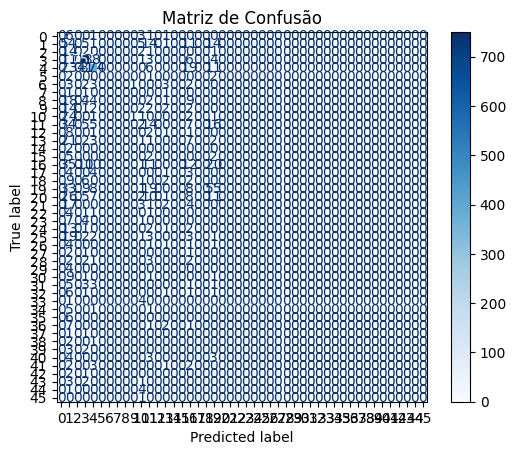

In [5]:
# Classification report e matriz de confusão
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)
print(classification_report(y_true, y_pred_classes))
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Matriz de Confusão")
plt.show()